In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [5]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

In [6]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the Model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 224s 132ms/step - loss: 0.1514 - accuracy: 0.9540 - val_loss: 0.0470 - val_accuracy: 0.9868
Epoch 2/5
1688/1688 [==============================] - 215s 127ms/step - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 3/5
1688/1688 [==============================] - 216s 128ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0402 - val_accuracy: 0.9888
Epoch 4/5
1688/1688 [==============================] - 235s 139ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0456 - val_accuracy: 0.9878
Epoch 5/5
1688/1688 [==============================] - 170s 101ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0443 - val_accuracy: 0.9883


In [8]:
#  Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 13s 41ms/step - loss: 0.0366 - accuracy: 0.9885
✅ Test Accuracy: 0.9885


313/313 [==============================] - 12s 37ms/step
Predicted Label for first image: 7


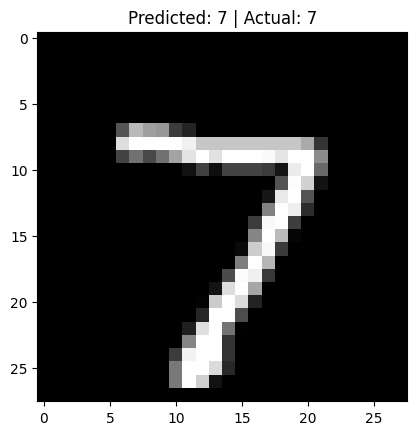

In [9]:
#  Make Predictions (optional)
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
print("Predicted Label for first image:", predicted_label)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label} | Actual: {y_test[0]}")
plt.show()

In [10]:
# Save the model for frontend usage (optional)
model.save("mnist_cnn_model.h5")